In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("task_data_churned.csv")

### Exploring data

In [4]:
df.shape

(2502, 26)

In [6]:
df.dtypes

ws_users_activated                   int64
ws_users_deactivated                 int64
ws_users_invited                     int64
action_create_project                int64
action_export_report                 int64
action_api_and_webhooks              int64
action_time_entries_via_tracker      int64
action_start_trial                   int64
action_import_csv                    int64
action_create_invoice                int64
action_lock_entries                  int64
action_add_targets                   int64
action_connect_quickbooks            int64
action_create_expense                int64
action_project_budget                int64
action_gps_tracking                float64
action_screenshots                 float64
action_create_custom_field         float64
country                             object
value_days_to_purchase               int64
value_number_of_active_months        int64
value_transactions_number            int64
value_regular_seats                  int64
value_kiosk

In [5]:
df.isnull().sum()

ws_users_activated                    0
ws_users_deactivated                  0
ws_users_invited                      0
action_create_project                 0
action_export_report                  0
action_api_and_webhooks               0
action_time_entries_via_tracker       0
action_start_trial                    0
action_import_csv                     0
action_create_invoice                 0
action_lock_entries                   0
action_add_targets                    0
action_connect_quickbooks             0
action_create_expense                 0
action_project_budget                 0
action_gps_tracking                1626
action_screenshots                 1458
action_create_custom_field         2059
country                              84
value_days_to_purchase                0
value_number_of_active_months         0
value_transactions_number             0
value_regular_seats                   0
value_kiosk_seats                     0
revenue                               0


In [53]:
df['churned_status'].value_counts()

No     1703
Yes     799
Name: churned_status, dtype: int64

Most of the variables are numeric. Data is not balanced, although there are significant number of cases in both classes. Some variables have missing values, data inputation will be considered in the next steps

### Descriptive statistics

In [8]:
df.describe(percentiles=(0.1,0.25,0.5,0.75,0.95,0.99))

,ws_users_activated,ws_users_deactivated,ws_users_invited,action_create_project,action_export_report,action_api_and_webhooks,action_time_entries_via_tracker,action_start_trial,action_import_csv,action_create_invoice,action_lock_entries,action_add_targets,action_connect_quickbooks,action_create_expense,action_project_budget,action_gps_tracking,action_screenshots,action_create_custom_field,value_days_to_purchase,value_number_of_active_months,value_transactions_number,value_regular_seats,value_kiosk_seats,revenue
count,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,876.000000,1044.000000,443.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000
mean,5.619504,0.827738,0.158273,28.043965,22.709432,0.383293,19.479616,0.175859,0.622702,8.494005,1.634293,0.290568,0.081934,10.019185,10.459233,1.371005,1.417625,7.246050,61.286571,4.215827,5.728617,6.067946,0.257794,378.331825
std,11.364130,3.527056,0.784527,80.761092,80.884964,3.089846,114.856050,0.380777,4.770705,52.699928,7.180274,1.319093,0.688108,72.849346,37.851112,0.726969,0.791806,11.577418,85.179584,3.691711,4.893211,11.766325,2.957970,1007.971191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
10%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,12.987000
25%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,38.961000
50%,2.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,24.000000,3.000000,4.000000,2.000000,0.000000,105.761500
75%,6.000000,0.000000,0.000000,26.000000,15.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,7.000000,84.750000,7.000000,8.000000,6.000000,0.000000,333.459750
95%,20.000000,4.000000,1.000000,106.950000,104.950000,1.000000,86.000000,1.000000,1.000000,31.950000,8.950000,2.000000,0.000000,34.950000,58.000000,3.000000,3.000000,24.000000,252.950000,11.000000,14.000000,21.000000,0.000000,1558.155300
99%,51.000000,14.000000,3.000000,338.980000,319.950000,7.000000,399.990000,1.000000,17.000000,136.990000,26.990000,5.000000,2.000000,172.000000,162.940000,4.000000,4.000000,61.000000,346.970000,13.000000,20.000000,53.990000,6.000000,3990.180610


All numeric variables have positive (>0) values. Some variables have extreme values (outliers). Minimum value for variables with missing values is 1 (which can mean that missing values are 0).

In [7]:
df.groupby('churned_status').describe()

ws_users_activated                                           \
                            count      mean        std  min  25%  50%  75%   
churned_status                                                               
No                         1703.0  6.918967  13.191681  0.0  1.0  3.0  7.0   
Yes                         799.0  2.849812   4.722895  0.0  1.0  1.0  3.0   

                      ws_users_deactivated                                     \
                  max                count      mean       std  min  25%  50%   
churned_status                                                                  
No              206.0               1703.0  0.889019  3.446419  0.0  0.0  0.0   
Yes              64.0                799.0  0.697121  3.691877  0.0  0.0  0.0   

                          ws_users_invited                                     \
                75%   max            count      mean       std  min  25%  50%   
churned_status                                                                  
No              0.0  61.0           1703.0  0.159718  0.764425  0.0  0.0  0.0   
Yes             0.0  73.0            799.0  0.155194  0.826227  0.0  0.0  0.0   

                          action_create_project                             \
                75%   max                 count       mean        std  min   
churned_status                                                               
No              0.0  20.0                1703.0  34.429243  92.906512  0.0   
Yes             0.0  17.0                 799.0  14.434293  41.944621  0.0   

                                        action_export_report             \
                25%   50%   75%     max                count       mean   
churned_status                                                            
No              3.0  11.0  32.0  1923.0               1703.0  28.867293   
Yes             1.0   4.0  13.0   774.0                799.0   9.584481   

                                                        \
                      std  min  25%  50%   75%     max   
churned_status                                           
No              94.201661  0.0  0.0  3.0  20.5  1740.0   
Yes             36.391116  0.0  0.0  0.0   4.0   560.0   

               action_api_and_webhooks                                     \
                                 count      mean       std  min  25%  50%   
churned_status                                                              
No                              1703.0  0.485614  3.696268  0.0  0.0  0.0   
Yes                              799.0  0.165207  0.843813  0.0  0.0  0.0   

                           action_time_entries_via_tracker             \
                75%    max                           count       mean   
churned_status                                                          
No              0.0  127.0                          1703.0  27.376395   
Yes             0.0   16.0                           799.0   2.648310   

                                                       action_start_trial  \
                       std  min  25%  50%  75%     max              count   
churned_status                                                              
No              136.887561  0.0  0.0  0.0  3.0  3382.0             1703.0   
Yes              31.022673  0.0  0.0  0.0  0.0   758.0              799.0   

                                                            action_import_csv  \
                    mean       std  min  25%  50%  75%  max             count   
churned_status                                                                  
No              0.193188  0.394916  0.0  0.0  0.0  0.0  1.0            1703.0   
Yes             0.138924  0.346083  0.0  0.0  0.0  0.0  1.0             799.0   

                                                               \
                    mean       std  min  25%  50%  75%    max   
churned_status                                                  
No             

When we compare statistics per group, we can see that class of churned elements have overall lower activity

In [9]:
df['country'].nunique()

155

In [10]:
df['country'].value_counts()

California                247
Australia                 156
Canada                    146
Florida                   125
United Kingdom            112
Germany                    90
Arizona                    68
Brazil                     58
France                     54
Alabama                    54
Colorado                   53
Illinois                   53
Georgia                    50
Texas                      49
South Africa               40
Belgium                    40
New York                   34
India                      34
Poland                     29
Austria                    27
New Zealand                26
Arkansas                   26
Philippines                26
Netherlands                25
Spain                      23
Connecticut                23
New Jersey                 23
Argentina                  21
North Carolina             21
Ohio                       19
Switzerland                19
Pennsylvania               18
Ireland                    17
Italy     

There are 155 categories in variable "country". It is possible to do some grouping, since states from USA are given separately. Also, it would be possible to group rows by continent. I am not going to do that here since it's time consuming.

<AxesSubplot:>

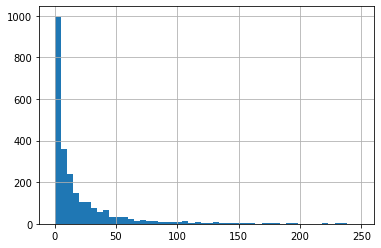

In [13]:
df.loc[df['action_create_project']<250,'action_create_project'].hist(bins=50)

### Data preprocessing

In [14]:
df['churned_status_num'] = df['churned_status'].replace({"Yes":1, "No":0})
df['churned_status_num'].value_counts()

0    1703
1     799
Name: churned_status_num, dtype: int64

Although I don't have exact information regarding variables with missing values, having in mind that minimum value for this variables is 1 while minimum value for all other "action" variables is 0, I will assume that missing values are 0

In [15]:
df[['action_gps_tracking', 'action_screenshots','action_create_custom_field']] = df[['action_gps_tracking', 'action_screenshots','action_create_custom_field']].fillna(0)

### Classification

Train test split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df[['ws_users_activated', 'ws_users_deactivated', 'ws_users_invited',
       'action_create_project', 'action_export_report',
       'action_api_and_webhooks', 'action_time_entries_via_tracker',
       'action_start_trial', 'action_import_csv', 'action_create_invoice',
       'action_lock_entries', 'action_add_targets',
       'action_connect_quickbooks', 'action_create_expense',
       'action_project_budget', 'value_days_to_purchase',
       'value_number_of_active_months', 'value_transactions_number',
       'value_regular_seats', 'value_kiosk_seats', 'revenue','action_gps_tracking', 'action_screenshots','action_create_custom_field']], df['churned_status_num'])

I'll create several function for training and evaluating several ml models, with various tresholds

In [34]:
def get_model_prediction(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_pred_proba = classifier.predict_proba(x_test)
    return classifier, y_pred, y_pred_proba

def get_roc_measures(y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    return fpr, tpr, roc_auc, optimal_threshold

def plot_roc(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def get_cl_report(y_pred_proba, treshold):
    print("Original report \n")
    print(classification_report(y_test,(y_pred_proba[:,1]>=0.5).astype(int)))
    print("Report with optimal treshold \n")
    print(classification_report(y_test,(y_pred_proba[:,1]>=treshold).astype(int)))
    
    
def train_classifier_with_reports(classifier, x_train, y_train, x_test, y_test):
    clf, y_pred, y_pred_proba = get_model_prediction(classifier, x_train, y_train, x_test, y_test)
    fpr, tpr, roc_auc, optimal_threshold = get_roc_measures(y_test, y_pred_proba)
    plot_roc(fpr, tpr, roc_auc)
    get_cl_report(y_pred_proba, optimal_threshold)

Random Forest Classifier

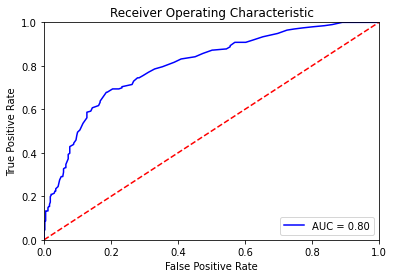

Original report 

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       430
           1       0.72      0.43      0.54       196

    accuracy                           0.77       626
   macro avg       0.75      0.68      0.69       626
weighted avg       0.76      0.77      0.75       626

Report with optimal treshold 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       430
           1       0.62      0.68      0.65       196

    accuracy                           0.77       626
   macro avg       0.74      0.75      0.74       626
weighted avg       0.78      0.77      0.77       626



In [35]:
train_classifier_with_reports(RandomForestClassifier(), x_train, y_train, x_test, y_test)

Changing treshold increases f1 score for class 1 (churned - yes), which compensates partially the fact that this class is under-represented. Overall accuracy doesn't change

Gradient Boosting Classifier

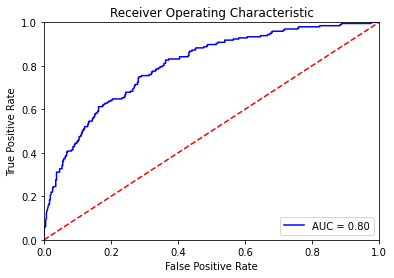

Original report 

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       430
           1       0.68      0.45      0.54       196

    accuracy                           0.76       626
   macro avg       0.73      0.68      0.69       626
weighted avg       0.75      0.76      0.74       626

Report with optimal treshold 

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       430
           1       0.55      0.75      0.63       196

    accuracy                           0.73       626
   macro avg       0.70      0.73      0.71       626
weighted avg       0.76      0.73      0.74       626



In [39]:
train_classifier_with_reports(GradientBoostingClassifier(), x_train, y_train, x_test, y_test)

Similarly, changing treshold increases f1 score for class 1, but in this case accuracy is decreased

Neural network

I'll test here also model from class of neural networks. Neural networks are generally more sensitive to outliers compared to Random Forest etc.

C:\Users\mfimic\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


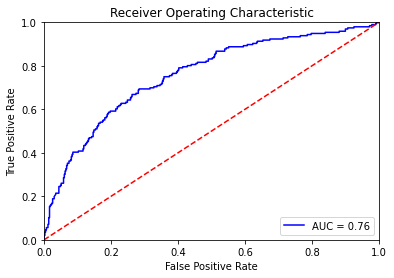

Original report 

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       430
           1       0.61      0.47      0.53       196

    accuracy                           0.74       626
   macro avg       0.70      0.67      0.68       626
weighted avg       0.73      0.74      0.73       626

Report with optimal treshold 

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       430
           1       0.53      0.69      0.60       196

    accuracy                           0.71       626
   macro avg       0.68      0.71      0.69       626
weighted avg       0.74      0.71      0.72       626



In [45]:
train_classifier_with_reports(MLPClassifier(alpha=0.00001, activation='tanh', random_state=1), x_train, y_train, x_test, y_test)

Results are bit worse compared to earlier models (less sensitive to outliers). It's possible to do some feature engineering such as outlier removal or variable scaling, that could introduce some improvements in the model results

Grid Search

Having Random Forest currently as the model with best test results, it's possible to test various combinations of hyperparameters, in order to find combination that produces best results

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameters = {'criterion':('gini', 'entropy','log_loss'), 'n_estimators':[10, 50, 100, 1000], 'max_depth': (None, 10,100), 'max_features':('sqrt', 'log2', None)}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': (None, 10, 100),
                         'max_features': ('sqrt', 'log2', None),
                         'n_estimators': [10, 50, 100, 1000]})

In [54]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': None,
 'param_grid': {'criterion': ('gini', 'entropy', 'log_loss'),
  'n_estimators': [10, 50, 100, 1000],
  'max_depth': (None, 10, 100),
  'max_features': ('sqrt', 'log2', None)},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [55]:
y_pred_new = clf.predict(x_test)

In [56]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       430
           1       0.66      0.50      0.57       196

    accuracy                           0.76       626
   macro avg       0.73      0.69      0.70       626
weighted avg       0.75      0.76      0.75       626



Result is similar to the original model, with default treshold. Result is slightly better for class 1.

### Conclusion

All tested models produce similar results, with Random Forest being the best one. f1 score for class 1 (churned-yes) is lower compared to other class due to imbalanced dataset. Changing treshold for class 1 result in improving the scores. <br>
There are additional options that can be explored such as feature engineering (specially for NN), and also oversampling (which can be good for balancing dataset, although there are drawbacks)